### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
path = "../Data/conducta_suicida.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,_id,ano_notificacion,codigo_localidadresidencia,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,1,2016,3,Santa Fe,LAS CRUCES,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Mujer,14,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
1,2,2012,8,Kennedy,UPZ Sin asignar,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Hombre,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
2,3,2012,19,Ciudad BolÃ­var,UPZ Sin asignar,12 â€“ 17 Adolescencia,Intento de Suicidio,Mujer,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
3,4,2012,10,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,8. TÃ©cnico post-secundaria completa,0,0,0,0,0,0,0,0,0,NaN
4,5,2012,10,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,6. Secundaria completa,0,0,0,0,0,0,0,0,0,NaN


### Eliminamos columnas _id y codigo_localidadresidencia

In [4]:
del df['_id']
del df['codigo_localidadresidencia']
df.head()

,ano_notificacion,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,2016,Santa Fe,LAS CRUCES,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Mujer,14,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
1,2012,Kennedy,UPZ Sin asignar,12 â€“ 17 Adolescencia,IdeaciÃ³n suicida,Hombre,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
2,2012,Ciudad BolÃ­var,UPZ Sin asignar,12 â€“ 17 Adolescencia,Intento de Suicidio,Mujer,13,5. Secundaria incompleta,0,0,0,0,0,0,0,0,0,Otra
3,2012,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,8. TÃ©cnico post-secundaria completa,0,0,0,0,0,0,0,0,0,NaN
4,2012,EngativÃ¡,UPZ Sin asignar,18 â€“ 28 Juventud,Intento de Suicidio,Mujer,26,6. Secundaria completa,0,0,0,0,0,0,0,0,0,NaN


# Data Wrangling

### Identificamos valores faltantes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212495 entries, 0 to 212494
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ano_notificacion           212495 non-null  int64 
 1   localidad_residencia       212495 non-null  object
 2   nombre_upz                 212495 non-null  object
 3   Curso de vida              212495 non-null  object
 4   clasificaciondelaconducta  212495 non-null  object
 5   sexo                       212495 non-null  object
 6   edad                       212495 non-null  int64 
 7   niveleducativo             212495 non-null  object
 8   enfermedades_dolorosas     212495 non-null  int64 
 9   maltrato_sexual            212495 non-null  int64 
 10  muerte_familiar            212495 non-null  int64 
 11  conflicto_pareja           212495 non-null  int64 
 12  problemas_economicos       212495 non-null  int64 
 13  esc_educ                   212495 non-null  

Como podemos ver la única columna con valores nulos es <b>poblacion_diferencial</b> con una aproximación de 20.093 valores faltantes.

### Observemos los valores únicos de la columna

In [6]:
value_counts = df['poblacion_diferencial'].value_counts()
value_counts

poblacion_diferencial
Ninguna                                94139
Otra                                   77435
Consumidor habitual de SPA              8019
PoblaciÃ³n LGBTIQ+                      6612
Madre Cabeza de Hogar                   2564
Trabajador Informal                     1086
En ProtecciÃ³n                          1044
Servidor pÃºblico                        692
Otro tipo de vÃ­ctima del conflicto      644
Menor Abandonado                         167
Name: count, dtype: int64

Reemplacemos los valores con la frecuencia o moda (<b>Ninguna</b>). 

In [7]:
df["poblacion_diferencial"].replace(np.nan, "Ninguna", inplace=True)

C:\Users\Dilan\AppData\Local\Temp\ipykernel_8664\4224689922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["poblacion_diferencial"].replace(np.nan, "Ninguna", inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212495 entries, 0 to 212494
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ano_notificacion           212495 non-null  int64 
 1   localidad_residencia       212495 non-null  object
 2   nombre_upz                 212495 non-null  object
 3   Curso de vida              212495 non-null  object
 4   clasificaciondelaconducta  212495 non-null  object
 5   sexo                       212495 non-null  object
 6   edad                       212495 non-null  int64 
 7   niveleducativo             212495 non-null  object
 8   enfermedades_dolorosas     212495 non-null  int64 
 9   maltrato_sexual            212495 non-null  int64 
 10  muerte_familiar            212495 non-null  int64 
 11  conflicto_pareja           212495 non-null  int64 
 12  problemas_economicos       212495 non-null  int64 
 13  esc_educ                   212495 non-null  

### Reemplacemos caracteres especiales de las columnas categóricas

In [9]:
#Replacing special characters in localidad_residencia
df['localidad_residencia'] = df['localidad_residencia'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in nombre_upz
df['nombre_upz'] = df['nombre_upz'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in Curso de vida
df['Curso de vida'] = df['Curso de vida'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in clasificaciondelaconducta
df['clasificaciondelaconducta'] = df['clasificaciondelaconducta'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in sexo
df['sexo'] = df['sexo'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in niveleducativo
df['niveleducativo'] = df['niveleducativo'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#Replacing special characters in poblacion_diferencial
df['poblacion_diferencial'] = df['poblacion_diferencial'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [10]:
# Verifiquemos que ya no hayan caracteres raros en las columnas categóricas
categorical_variables = [ 
                      "localidad_residencia",
                      "nombre_upz",
                      "Curso de vida",
                      "clasificaciondelaconducta",
                      "sexo",
                      "niveleducativo",
                      "poblacion_diferencial"]

for column in categorical_variables:
    print("\nConteo de valores únicos para la variable:", column)
    print(df[column].value_counts())


Conteo de valores únicos para la variable: localidad_residencia
localidad_residencia
Kennedy               28115
Suba                  25869
Bosa                  23501
Ciudad Bolvar         21686
Engativ               19300
Usme                  13587
San Cristbal          11694
Rafael Uribe Uribe    11412
Fontibn               10855
Usaqun                10583
Puente Aranda          6950
Tunjuelito             6327
Teusaquillo            4585
Barrios Unidos         3978
Santa Fe               3812
Chapinero              3579
Los Mrtires            2929
Antonio Nario          2555
La Candelaria           828
Sumapaz                 238
Sin dato                112
Name: count, dtype: int64

Conteo de valores únicos para la variable: nombre_upz
nombre_upz
UPZ Sin asignar         10034
BOSA CENTRAL             8054
BOSA OCCIDENTAL          6819
EL RINCON                6729
TIBABUYES                5882
                        ...  
PARQUE SALITRE             40
AEROPUERTO EL DORADO    

### Corregir los tipos de datos

In [11]:
df.dtypes

ano_notificacion               int64
codigo_localidadresidencia    object
localidad_residencia          object
nombre_upz                    object
Curso de vida                 object
clasificaciondelaconducta     object
sexo                          object
edad                           int64
niveleducativo                object
enfermedades_dolorosas         int64
maltrato_sexual                int64
muerte_familiar                int64
conflicto_pareja               int64
problemas_economicos           int64
esc_educ                       int64
problemas_juridicos            int64
problemas_laborales            int64
suicidio_amigo                 int64
poblacion_diferencial         object
dtype: object

In [11]:
# A las columnas booleanas se les asigna el tipo de dato booleano
df['enfermedades_dolorosas'] = df['enfermedades_dolorosas'].astype(bool)
df['maltrato_sexual'] = df['maltrato_sexual'].astype(bool)
df['muerte_familiar'] = df['muerte_familiar'].astype(bool)
df['conflicto_pareja'] = df['conflicto_pareja'].astype(bool)
df['problemas_economicos'] = df['problemas_economicos'].astype(bool)
df['problemas_juridicos'] = df['problemas_juridicos'].astype(bool)
df['problemas_laborales'] = df['problemas_laborales'].astype(bool)
df['suicidio_amigo'] = df['suicidio_amigo'].astype(bool)
df['esc_educ'] = df['esc_educ'].astype(bool)

In [12]:
# Verificamos los cambios
df.dtypes

ano_notificacion              int64
localidad_residencia         object
nombre_upz                   object
Curso de vida                object
clasificaciondelaconducta    object
sexo                         object
edad                          int64
niveleducativo               object
enfermedades_dolorosas         bool
maltrato_sexual                bool
muerte_familiar                bool
conflicto_pareja               bool
problemas_economicos           bool
esc_educ                       bool
problemas_juridicos            bool
problemas_laborales            bool
suicidio_amigo                 bool
poblacion_diferencial        object
dtype: object

In [13]:
df.head()

,ano_notificacion,localidad_residencia,nombre_upz,Curso de vida,clasificaciondelaconducta,sexo,edad,niveleducativo,enfermedades_dolorosas,maltrato_sexual,muerte_familiar,conflicto_pareja,problemas_economicos,esc_educ,problemas_juridicos,problemas_laborales,suicidio_amigo,poblacion_diferencial
0,2016,Santa Fe,LAS CRUCES,12 17 Adolescencia,Ideacin suicida,Mujer,14,5 Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
1,2012,Kennedy,UPZ Sin asignar,12 17 Adolescencia,Ideacin suicida,Hombre,13,5 Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
2,2012,Ciudad Bolvar,UPZ Sin asignar,12 17 Adolescencia,Intento de Suicidio,Mujer,13,5 Secundaria incompleta,False,False,False,False,False,False,False,False,False,Otra
3,2012,Engativ,UPZ Sin asignar,18 28 Juventud,Intento de Suicidio,Mujer,26,8 Tcnico postsecundaria completa,False,False,False,False,False,False,False,False,False,Ninguna
4,2012,Engativ,UPZ Sin asignar,18 28 Juventud,Intento de Suicidio,Mujer,26,6 Secundaria completa,False,False,False,False,False,False,False,False,False,Ninguna


### Análisis descriptivo de las variables numéricas

In [14]:
df.describe()

,ano_notificacion,edad
count,212495.000000,212495.000000
mean,2020.481037,24.372649
std,3.278523,13.720469
min,2012.000000,1.000000
25%,2018.000000,15.000000
50%,2022.000000,20.000000
75%,2023.000000,30.000000
max,2024.000000,99.000000


### Columna clasificaciondelaconducta

In [15]:
df['clasificaciondelaconducta'].value_counts()

clasificaciondelaconducta
Ideacin suicida        150761
Intento de Suicidio     61734
Name: count, dtype: int64

Nos vamos a enfocar en la población que realizó un <b>Intento de Suicidio</b>

In [16]:
df_intento_suicidio = df[df['clasificaciondelaconducta'] == "Intento de Suicidio"]
df_intento_suicidio.describe()

,ano_notificacion,edad
count,61734.000000,61734.000000
mean,2019.652023,24.748874
std,3.598126,11.998532
min,2012.000000,1.000000
25%,2017.000000,16.000000
50%,2021.000000,21.000000
75%,2023.000000,29.000000
max,2024.000000,99.000000


# Data grouping

In [17]:
# Observemos la agrupación de la variable Curso de Vida
df_intento_suicidio['Curso de vida'].unique()

array(['12  17 Adolescencia', '18  28 Juventud', '6  11 Infancia',
       '29  59 Adultez', '60 Vejez', '0  5 Primera Infancia'],
      dtype=object)

In [ ]:
# # Define a function to bin curso_vida by age
# def bin_curso_vida(curso_vida):
#   if curso_vida in ['0  5 Primera Infancia', '6  11 Infancia', '12  17 Adolescencia']:
#     return '< 18 years old'
#   elif curso_vida in ['18  28 Juventud', '29  59 Adultez']:
#     return '18-59 years old'
#   else:``
#     return '>= 60 years old'
  
# # Create a new column 'group_age' by applying the bin_curso_vida function
# df['group_age'] = df['Curso de vida'].apply(bin_curso_vida)

# df['group_age']

0          < 18 years old
1          < 18 years old
2          < 18 years old
3         18-59 years old
4         18-59 years old
               ...       
212490    18-59 years old
212491    18-59 years old
212492    18-59 years old
212493    18-59 years old
212494    18-59 years old
Name: group_age, Length: 212495, dtype: object

<Axes: title={'center': 'Grupos de edad'}, ylabel='count'>

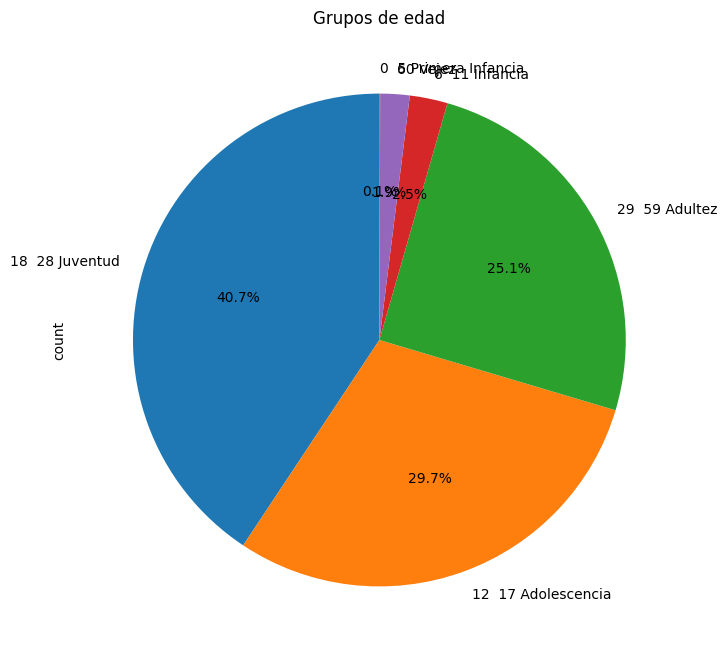

In [18]:
# Observemos la distribución en un diagrama de torta
df_intento_suicidio['Curso de vida'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Grupos de edad'
)

Como los datos de los grupos de primera infancia (0 a 5 años) e infancia (6 a 11 años) son muy pequeños, se decide incluirlos en el grupo de adolescencia. Lo mismo sucede con el grupo vejez (mayores de 60 años), se incluye en grupo poblacional de adultez (29 a 59 años). 

In [19]:
# Reemplazo de valores 0  5 Primera Infancia
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('0  5 Primera Infancia','12  17 Adolescencia')
# Reemplazo de valores 6  11 Infancia
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('6  11 Infancia','12  17 Adolescencia')
# Reemplazo de valores 60 Vejez
df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('60 Vejez','29  59 Adultez')

C:\Users\Dilan\AppData\Local\Temp\ipykernel_8664\2021610872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('0  5 Primera Infancia','12  17 Adolescencia')
C:\Users\Dilan\AppData\Local\Temp\ipykernel_8664\2021610872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intento_suicidio['Curso de vida'] = df_intento_suicidio['Curso de vida'].replace('6  11 Infancia','12  17 Adolescencia')
C:\Users\Dilan\AppData\Local\Temp

<Axes: title={'center': 'Grupos de edad'}, ylabel='count'>

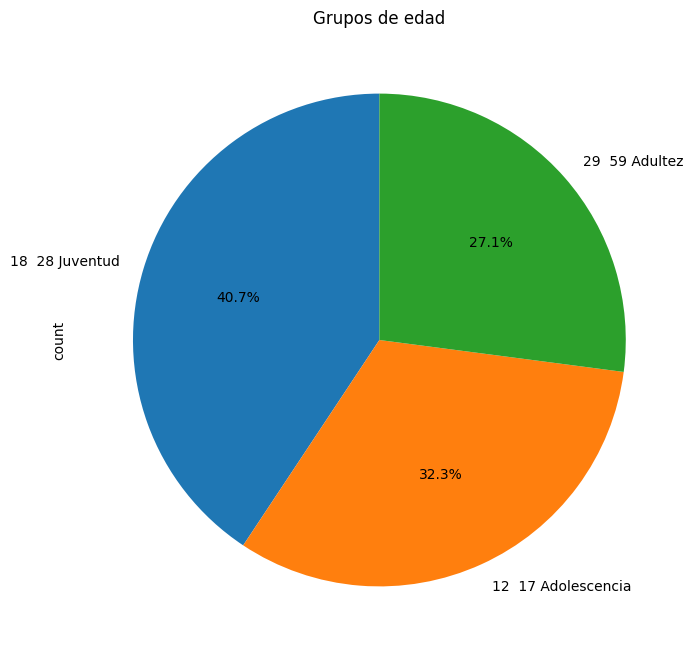

In [20]:
df_intento_suicidio['Curso de vida'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Grupos de edad'
)

<Axes: title={'center': 'Sexo'}, ylabel='count'>

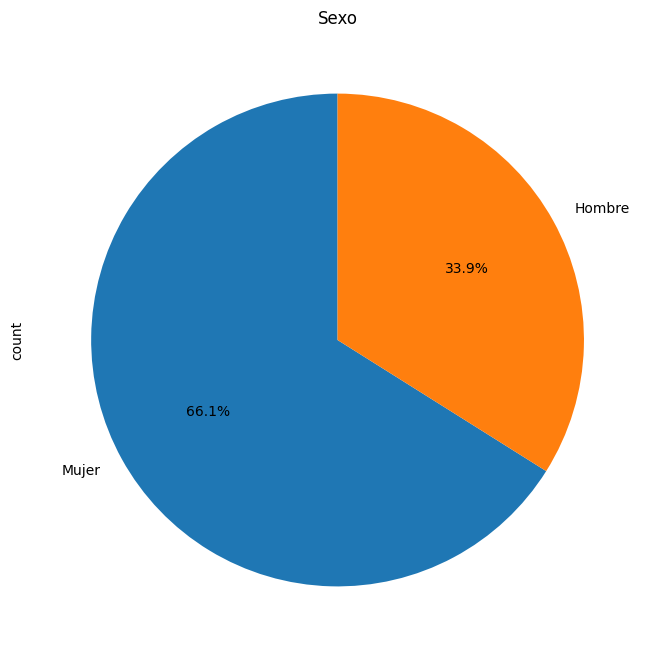

In [21]:
# Análisis por el sexo
df_intento_suicidio['sexo'].value_counts().plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=90,
    title='Sexo'
)

In [22]:
# Análisis por localidad_residencia
df_intento_suicidio['localidad_residencia'].value_counts()

localidad_residencia
Suba                  8138
Kennedy               7516
Ciudad Bolvar         6380
Bosa                  6038
Engativ               5437
Usme                  3931
Usaqun                3667
San Cristbal          3587
Rafael Uribe Uribe    3390
Fontibn               2671
Puente Aranda         1876
Tunjuelito            1836
Teusaquillo           1436
Barrios Unidos        1322
Chapinero             1247
Santa Fe              1205
Los Mrtires            941
Antonio Nario          750
La Candelaria          261
Sin dato                68
Sumapaz                 37
Name: count, dtype: int64

In [24]:
# Como valores que aparecen como Sin Dato, se reemplazan por la moda.
df_intento_suicidio['localidad_residencia']
df_intento_suicidio.loc[df['localidad_residencia'] == 'Sin dato', 'localidad_residencia'] = 'Suba'
df_intento_suicidio['localidad_residencia'].value_counts()

localidad_residencia
Suba                  8206
Kennedy               7516
Ciudad Bolvar         6380
Bosa                  6038
Engativ               5437
Usme                  3931
Usaqun                3667
San Cristbal          3587
Rafael Uribe Uribe    3390
Fontibn               2671
Puente Aranda         1876
Tunjuelito            1836
Teusaquillo           1436
Barrios Unidos        1322
Chapinero             1247
Santa Fe              1205
Los Mrtires            941
Antonio Nario          750
La Candelaria          261
Sumapaz                 37
Name: count, dtype: int64

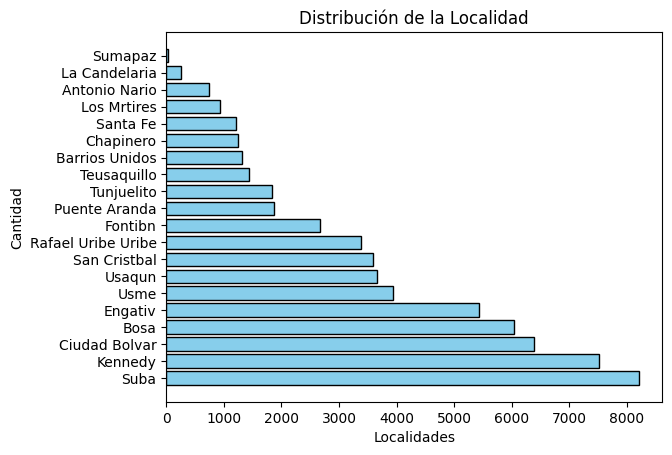

In [27]:
#Crear gráfico de barras
localidad_count = df_intento_suicidio['localidad_residencia'].value_counts()

# Crear gráfica de barras
plt.barh(localidad_count.index, localidad_count.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('Localidades')
plt.ylabel('Cantidad')
plt.title('Distribución de la Localidad')

# Mostrar gráfico
plt.show()

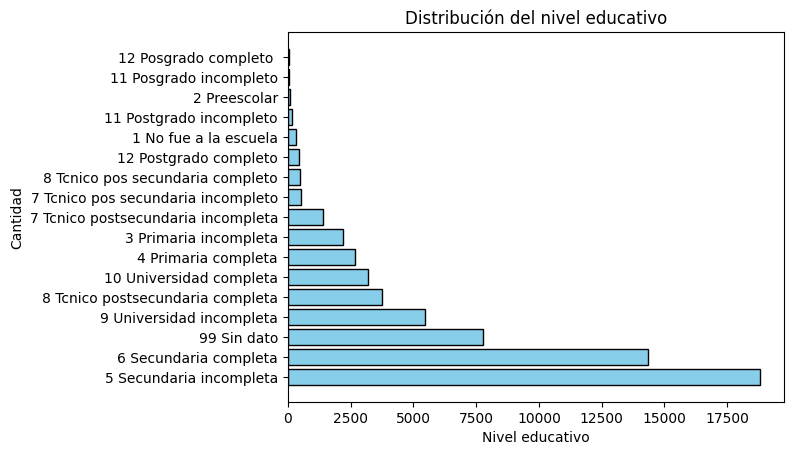

In [31]:
# Análisis con el nivel educativo
#Crear gráfico de barras
educacion_conteo = df_intento_suicidio['niveleducativo'].value_counts()

# Crear gráfica de barras
plt.barh(educacion_conteo.index, educacion_conteo.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.title('Distribución del nivel educativo')

# Mostrar gráfico
plt.show()

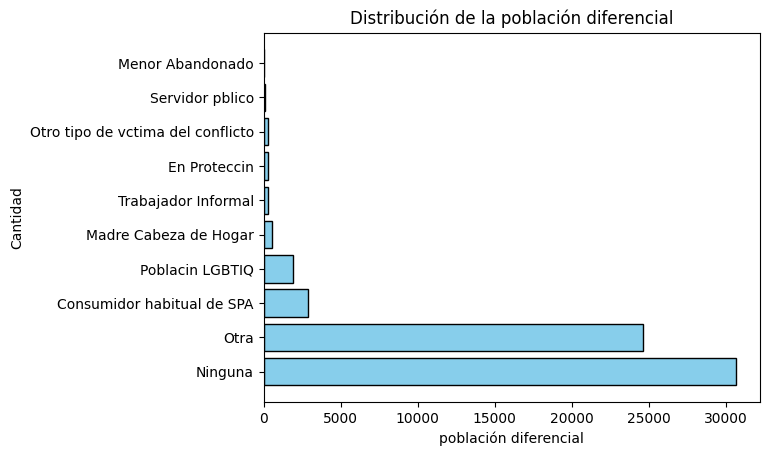

In [30]:
# Análisis con la población diferencial
#Crear gráfico de barras
poblacion_conteo = df_intento_suicidio['poblacion_diferencial'].value_counts()

# Crear gráfica de barras
plt.barh(poblacion_conteo.index, poblacion_conteo.values, color="skyblue", edgecolor="black")

# Agregar etiquetas
plt.xlabel('población diferencial')
plt.ylabel('Cantidad')
plt.title('Distribución de la población diferencial')

# Mostrar gráfico
plt.show()

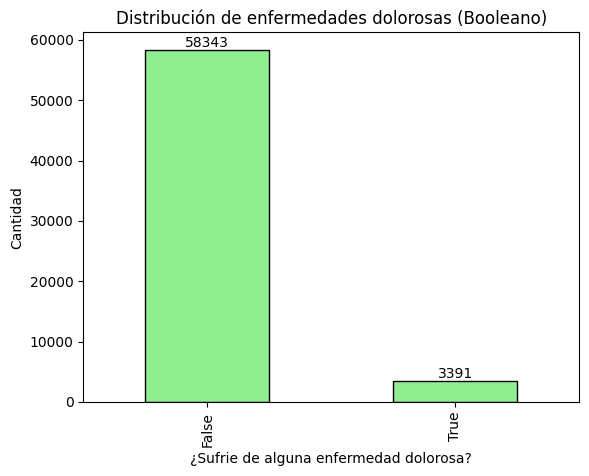

In [53]:
# Análisis de enfermedades dolorosas
#Crear gráfico de barras
enfermedades_conteo = df_intento_suicidio['enfermedades_dolorosas'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
enfermedades_conteo.bar_label(enfermedades_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Sufrie de alguna enfermedad dolorosa?')
plt.ylabel('Cantidad')
plt.title('Distribución de enfermedades dolorosas (Booleano)')

# Mostrar gráfico
plt.show()

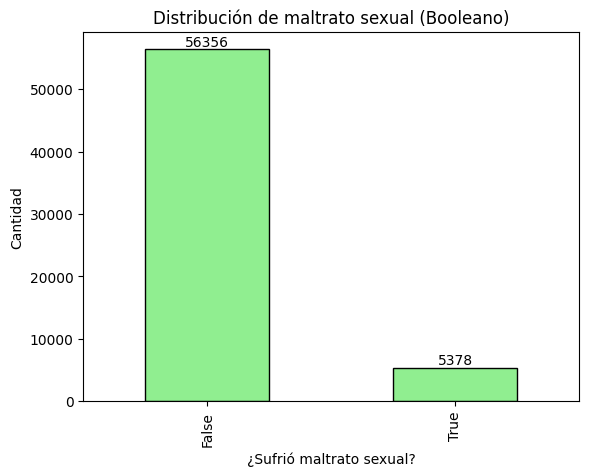

In [54]:
# Análisis de matrato sexual
#Crear gráfico de barras
maltrato_sexual_conteo = df_intento_suicidio['maltrato_sexual'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
maltrato_sexual_conteo.bar_label(maltrato_sexual_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Sufrió maltrato sexual?')
plt.ylabel('Cantidad')
plt.title('Distribución de maltrato sexual (Booleano)')

# Mostrar gráfico
plt.show()

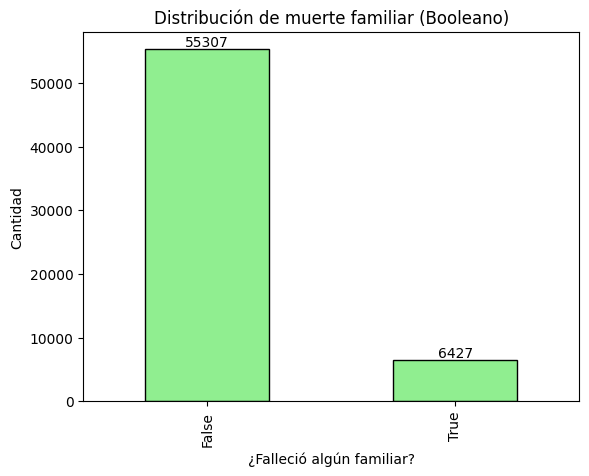

In [55]:
# Análisis de muerte familiar
#Crear gráfico de barras
muerte_familiar_conteo = df_intento_suicidio['muerte_familiar'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
for container in muerte_familiar_conteo.containers:
    muerte_familiar_conteo.bar_label(container)

# Crear gráfica de barras
plt.xlabel('¿Falleció algún familiar?')
plt.ylabel('Cantidad')
plt.title('Distribución de muerte familiar (Booleano)')

# Mostrar gráfico
plt.show()

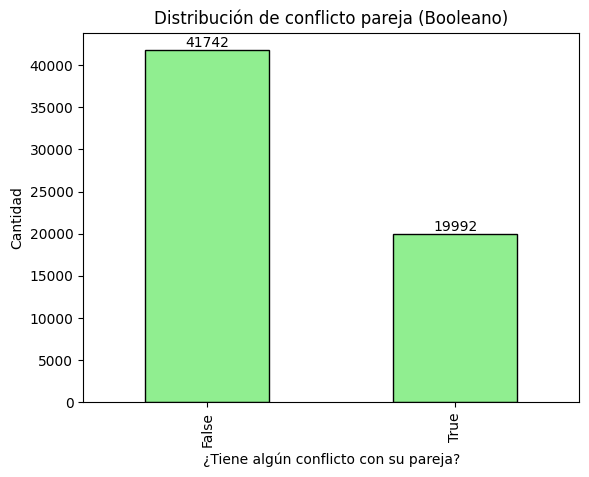

In [56]:
# Análisis de conflicto de pareja
#Crear gráfico de barras
conflicto_pareja_conteo = df_intento_suicidio['conflicto_pareja'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
conflicto_pareja_conteo.bar_label(conflicto_pareja_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene algún conflicto con su pareja?')
plt.ylabel('Cantidad')
plt.title('Distribución de conflicto pareja (Booleano)')

# Mostrar gráfico
plt.show()

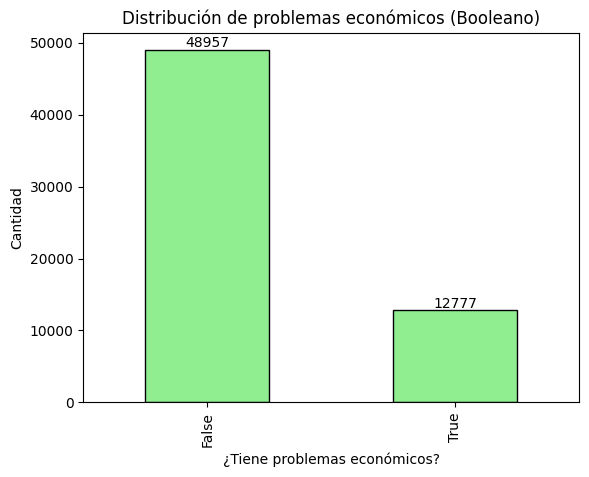

In [57]:
# Análisis de problemas económicos
#Crear gráfico de barras
problemas_economicos_conteo = df_intento_suicidio['problemas_economicos'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_economicos_conteo.bar_label(problemas_economicos_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas económicos?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas económicos (Booleano)')

# Mostrar gráfico
plt.show()

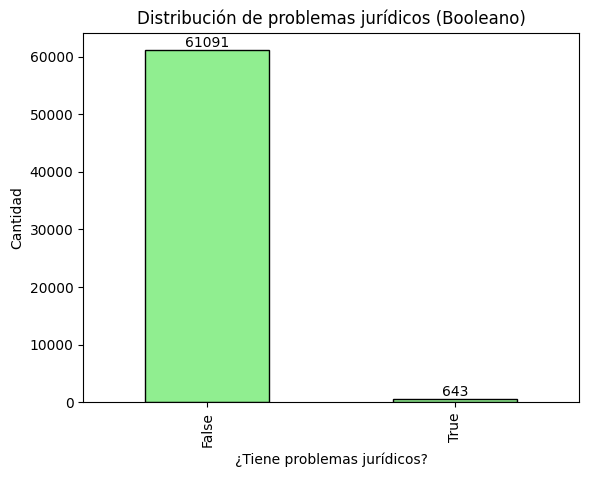

In [58]:
# Análisis de problemas jurídicos
#Crear gráfico de barras
problemas_juridicos_conteo = df_intento_suicidio['problemas_juridicos'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_juridicos_conteo.bar_label(problemas_juridicos_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas jurídicos?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas jurídicos (Booleano)')

# Mostrar gráfico
plt.show()

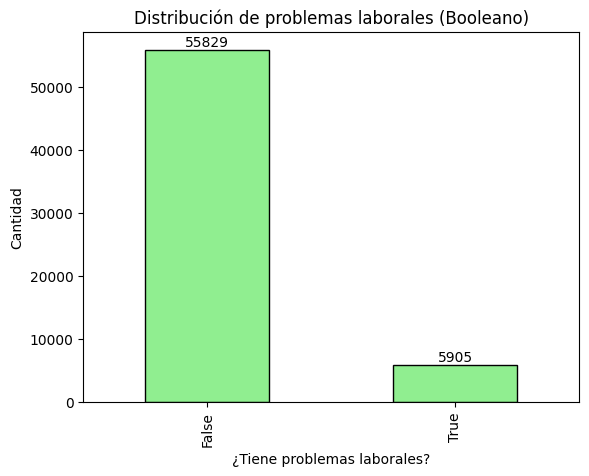

In [50]:
# Análisis de problemas laborales
#Crear gráfico de barras
problemas_laborales_conteo = df_intento_suicidio['problemas_laborales'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
problemas_laborales_conteo.bar_label(problemas_laborales_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene problemas laborales?')
plt.ylabel('Cantidad')
plt.title('Distribución de problemas laborales (Booleano)')

# Mostrar gráfico
plt.show()

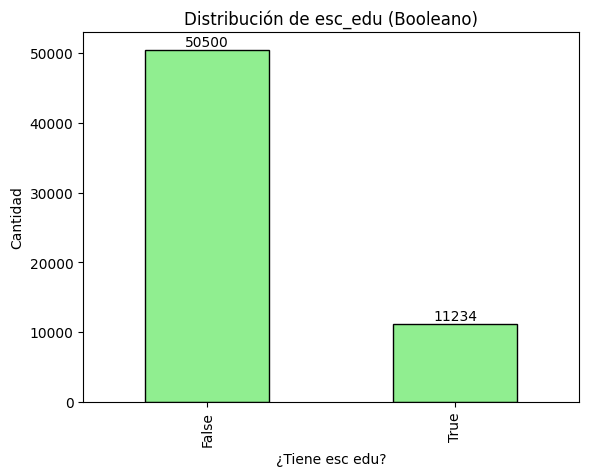

In [51]:
# Análisis de esc_edu
#Crear gráfico de barras
esc_educ_conteo = df_intento_suicidio['esc_educ'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
esc_educ_conteo.bar_label(esc_educ_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Tiene esc edu?')
plt.ylabel('Cantidad')
plt.title('Distribución de esc_edu (Booleano)')

# Mostrar gráfico
plt.show()

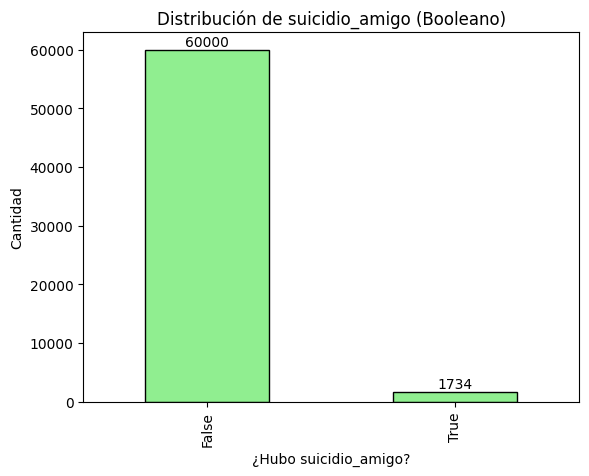

In [59]:
# Análisis de suicidio amigo
#Crear gráfico de barras
suicidio_amigo_conteo = df_intento_suicidio['suicidio_amigo'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')

# Agregar texto encima de cada barra
suicidio_amigo_conteo.bar_label(suicidio_amigo_conteo.containers[0])

# Crear gráfica de barras
plt.xlabel('¿Hubo suicidio_amigo?')
plt.ylabel('Cantidad')
plt.title('Distribución de suicidio_amigo (Booleano)')

# Mostrar gráfico
plt.show()